In [1]:
# for pytorch
import torchvision
import torchvision . transforms as transforms
# Define data transformations ( optional , butrecommended )
transform = transforms . Compose ([ transforms . ToTensor () ,
transforms . Normalize ((0.5 , 0.5 , 0.5) , (0.5 , 0.5 ,0.5) )])

# Load the training dataset
train_dataset = torchvision . datasets . CIFAR10 ( root =r'E:\UOM\Academic\Semester 5\Pattern Recognition\Assignment 03', train =True , transform = transform , download =True )
# Load the testing dataset
test_dataset = torchvision . datasets . CIFAR10 ( root =r'E:\UOM\Academic\Semester 5\Pattern Recognition\Assignment 03', train =False , transform = transform , download =True )
# for keras
from keras . datasets import cifar10
# Load the CIFAR -10 dataset
( train_images , train_labels ), ( test_images ,test_labels ) = cifar10 . load_data ()

Files already downloaded and verified
Files already downloaded and verified


In [2]:
import torch
from torch.utils.data import random_split


# Calculate the sizes for training, validation, and test sets
total_size = len(train_dataset)
train_size = int(0.6 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

# Split the dataset
train_set, val_set, test_set = random_split(train_dataset, [train_size, val_size, test_size])

# Create data loaders for training, validation, and testing
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, x1, m1, x2, m2, x3, m3, x4, d):
        super(SimpleCNN, self).__init__()

        # Convolutional layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=x1, kernel_size=m1, stride=1, padding=2) #m1=5
        self.bn1 = nn.BatchNorm2d(x1)
        self.relu1 = nn.ReLU()

        # Max pooling layer 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional layer 2
        self.conv2 = nn.Conv2d(in_channels=x1, out_channels=x2, kernel_size=m2, stride=1, padding=2) #m2=5
        self.bn2 = nn.BatchNorm2d(x2)
        self.relu2 = nn.ReLU()

        # Max pooling layer 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional layer 3
        self.conv3 = nn.Conv2d(in_channels=x2, out_channels=x3, kernel_size=m3, stride=1, padding=2)
        self.bn3 = nn.BatchNorm2d(x3)
        self.relu3 = nn.ReLU()

        # Max pooling layer 3
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flatten the output
        self.flatten = nn.Flatten()

        # Fully connected layer 1
        self.fc1 = nn.Linear(x3*(32//8)*(32//8), x4)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p=d)

        # Output layer
        self.fc2 = nn.Linear(x4, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Convolutional layer 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        # Max pooling layer 1
        x = self.maxpool1(x)

        # Convolutional layer 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        # Max pooling layer 2
        x = self.maxpool2(x)

        # Convolutional layer 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)

        # Max pooling layer 3
        x = self.maxpool3(x)

        # Flatten the output
        x = self.flatten(x)

        # Fully connected layer 1
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)

        # Output layer
        x = self.fc2(x)
        x = self.softmax(x)

        return x
    
x1, m1, x2, m2, x3, m3, x4, d = 32, 5, 64, 5, 128, 5, 64, 0.5
model = SimpleCNN(x1, m1, x2, m2, x3, m3, x4, d)

# Print the model
print(model)

# Print model parameters in a table format
print("\nModel Parameters:")
for name, param in model.named_parameters():
    print(f"{name}\t\t{param.shape}\t\tTotal Parameters: {param.numel()}")

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=2048, out_features=64, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)


Epoch [1/20], Train Loss: 2.1007, Val Loss: 2.0052
Epoch [2/20], Train Loss: 1.9755, Val Loss: 1.9288
Epoch [3/20], Train Loss: 1.9227, Val Loss: 1.9000
Epoch [4/20], Train Loss: 1.8898, Val Loss: 1.8766
Epoch [5/20], Train Loss: 1.8667, Val Loss: 1.8454
Epoch [6/20], Train Loss: 1.8438, Val Loss: 1.8202
Epoch [7/20], Train Loss: 1.8252, Val Loss: 1.8254
Epoch [8/20], Train Loss: 1.8109, Val Loss: 1.8029
Epoch [9/20], Train Loss: 1.7959, Val Loss: 1.8111
Epoch [10/20], Train Loss: 1.7869, Val Loss: 1.7862
Epoch [11/20], Train Loss: 1.7766, Val Loss: 1.7712
Epoch [12/20], Train Loss: 1.7653, Val Loss: 1.7872
Epoch [13/20], Train Loss: 1.7543, Val Loss: 1.7626
Epoch [14/20], Train Loss: 1.7476, Val Loss: 1.7528
Epoch [15/20], Train Loss: 1.7373, Val Loss: 1.7589
Epoch [16/20], Train Loss: 1.7304, Val Loss: 1.7581
Epoch [17/20], Train Loss: 1.7224, Val Loss: 1.7610
Epoch [18/20], Train Loss: 1.7141, Val Loss: 1.7510
Epoch [19/20], Train Loss: 1.7077, Val Loss: 1.7472
Epoch [20/20], Train 

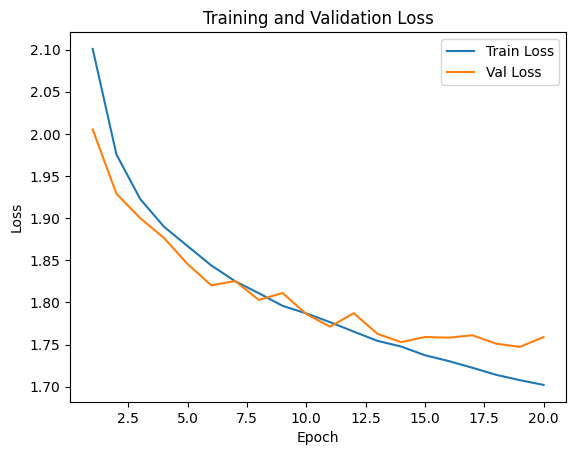

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00025)

# Define the number of epochs
num_epochs = 20

# Lists to store the training and validation loss
train_loss = []
val_loss = []

# Training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()

    # Initialize the running loss
    running_loss = 0.0

    # Iterate over the training dataset
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Calculate the average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader)

    # Set the model to evaluation mode
    model.eval()

    # Initialize the running loss for validation
    running_val_loss = 0.0

    # Iterate over the validation dataset
    for images, labels in val_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Update the running loss for validation
        running_val_loss += loss.item()

    # Calculate the average validation loss for the epoch
    avg_val_loss = running_val_loss / len(val_loader)

    # Append the training and validation loss to the respective lists
    train_loss.append(avg_train_loss)
    val_loss.append(avg_val_loss)

    # Print the training and validation loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# Plot the training and validation loss
plt.plot(range(1, num_epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Test Accuracy: 70.78%


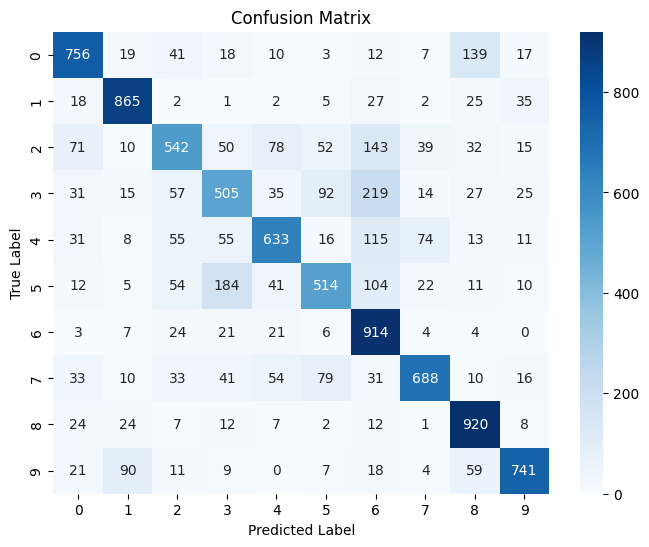

Weighted Precision: 0.7132
Weighted Recall: 0.7078


In [5]:
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)  # Get the index of the class with the maximum probability
        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Precision and Recall
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print(f'Weighted Precision: {precision:.4f}')
print(f'Weighted Recall: {recall:.4f}')



Fine-tuning resnet for CIFAR-10:
Epoch 1/10, Train Loss: 1.9670, Validation Loss: 1.5417
Epoch 2/10, Train Loss: 1.3195, Validation Loss: 1.2165
Epoch 3/10, Train Loss: 1.0668, Validation Loss: 1.0656
Epoch 4/10, Train Loss: 0.9195, Validation Loss: 0.9780
Epoch 5/10, Train Loss: 0.8176, Validation Loss: 0.9205
Epoch 6/10, Train Loss: 0.7332, Validation Loss: 0.8883
Epoch 7/10, Train Loss: 0.6557, Validation Loss: 0.8559
Epoch 8/10, Train Loss: 0.5988, Validation Loss: 0.8381
Epoch 9/10, Train Loss: 0.5359, Validation Loss: 0.8269
Epoch 10/10, Train Loss: 0.4894, Validation Loss: 0.8164

Final resnet Training  Loss: 0.4894
Final resnet Validation Loss: 0.8164


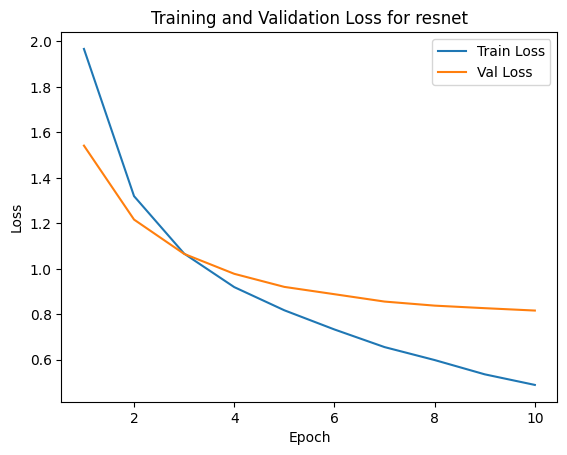


Fine-tuning densenet for CIFAR-10:
Epoch 1/10, Train Loss: 2.0702, Validation Loss: 1.7553
Epoch 2/10, Train Loss: 1.4715, Validation Loss: 1.3200
Epoch 3/10, Train Loss: 1.1412, Validation Loss: 1.0943
Epoch 4/10, Train Loss: 0.9537, Validation Loss: 0.9678
Epoch 5/10, Train Loss: 0.8283, Validation Loss: 0.8782
Epoch 6/10, Train Loss: 0.7306, Validation Loss: 0.8204
Epoch 7/10, Train Loss: 0.6536, Validation Loss: 0.7752
Epoch 8/10, Train Loss: 0.5801, Validation Loss: 0.7476
Epoch 9/10, Train Loss: 0.5241, Validation Loss: 0.7241
Epoch 10/10, Train Loss: 0.4624, Validation Loss: 0.7092

Final densenet Training Loss: 0.4624
Final densenet Validation Loss: 0.7092


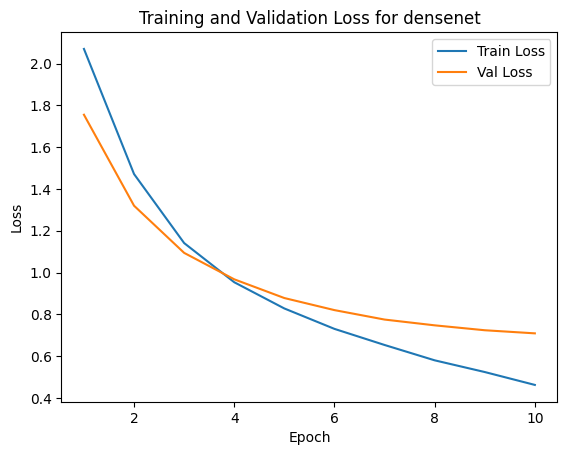


Fine-tuning googlenet for CIFAR-10:


c:\Python311\cv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 2.2113, Validation Loss: 2.0716
Epoch 2/10, Train Loss: 1.9084, Validation Loss: 1.7561
Epoch 3/10, Train Loss: 1.5993, Validation Loss: 1.4925
Epoch 4/10, Train Loss: 1.3717, Validation Loss: 1.3184
Epoch 5/10, Train Loss: 1.2173, Validation Loss: 1.2069
Epoch 6/10, Train Loss: 1.1105, Validation Loss: 1.1289
Epoch 7/10, Train Loss: 1.0273, Validation Loss: 1.0739
Epoch 8/10, Train Loss: 0.9520, Validation Loss: 1.0286
Epoch 9/10, Train Loss: 0.8919, Validation Loss: 1.0011
Epoch 10/10, Train Loss: 0.8432, Validation Loss: 0.9722

Final googlenet Training Loss: 0.8432
Final googlenet Validation Loss: 0.9722


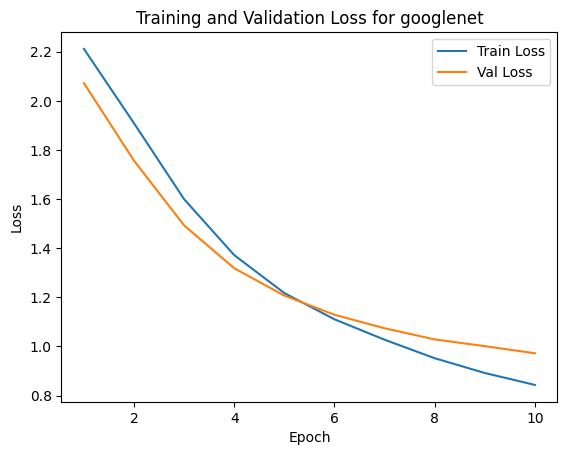

In [21]:
import torch
import torchvision
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt


# Function to load a pre-trained model and modify the classifier for CIFAR-10
def load_and_modify_model(model_name):
    if model_name == 'resnet':
        model = models.resnet18(pretrained=True)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, 10)  # Modify the classifier for CIFAR-10
    elif model_name == 'densenet':
        model = models.densenet121(pretrained=True)
        in_features = model.classifier.in_features
        model.classifier = nn.Linear(in_features, 10)  # Modify the classifier for CIFAR-10
    elif model_name == 'googlenet':
        model = models.googlenet(pretrained=True)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, 10)  # Modify the classifier for CIFAR-10
    else:
        raise ValueError("Invalid model name")
    
    return model

num_epochs = 10

# Function to fine-tune the model
def fine_tune_model(model, train_loader, test_loader, num_epochs=10, learning_rate=0.00001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store training and validation losses
    train_losses = []
    val_losses = []

    # Fine-tuning loop
    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        # Average training loss for the epoch
        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

        # Average validation loss for the epoch
        avg_val_loss = running_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Choose the models to fine-tune
model_names = ['resnet', 'densenet', 'googlenet']

# Fine-tune each model
#resnet
print(f"\nFine-tuning {model_names[0]} for CIFAR-10:")
pre_trained_resnet_model = load_and_modify_model(model_names[0])
train_resnet_losses, val_resnet_losses = fine_tune_model(pre_trained_resnet_model, train_loader, test_loader)

# Print the final training and validation loss values
print(f"\nFinal resnet Training  Loss: {train_resnet_losses[-1]:.4f}")
print(f"Final resnet Validation Loss: {val_resnet_losses[-1]:.4f}")

# Plot the training and validation loss
plt.plot(range(1, num_epochs+1), train_resnet_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_resnet_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for resnet')
plt.legend()
plt.show()


#densenet
print(f"\nFine-tuning {model_names[1]} for CIFAR-10:")
pre_trained_densenet_model = load_and_modify_model(model_names[1])
train_densenet_losses, val_densenet_losses = fine_tune_model(pre_trained_densenet_model, train_loader, test_loader)

# Print the final training and validation loss values
print(f"\nFinal densenet Training Loss: {train_densenet_losses[-1]:.4f}")
print(f"Final densenet Validation Loss: {val_densenet_losses[-1]:.4f}")

# Plot the training and validation loss
plt.plot(range(1, num_epochs+1), train_densenet_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_densenet_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for densenet')  
plt.legend()
plt.show()


#googlenet
print(f"\nFine-tuning {model_names[2]} for CIFAR-10:")
pre_trained_googlenet_model = load_and_modify_model(model_names[2])
train_googlenet_losses, val_googlenet_losses = fine_tune_model(pre_trained_googlenet_model, train_loader, test_loader)

# Print the final training and validation loss values
print(f"\nFinal googlenet Training Loss: {train_googlenet_losses[-1]:.4f}")
print(f"Final googlenet Validation Loss: {val_googlenet_losses[-1]:.4f}")

# Plot the training and validation loss
plt.plot(range(1, num_epochs+1), train_googlenet_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_googlenet_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for googlenet')
plt.legend()
plt.show()





In [22]:
import torch
from sklearn.metrics import accuracy_score

# Function to evaluate a model on the testing dataset
def evaluate_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    device = next(model.parameters()).device  # Get the device of the model

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)  # Get the index of the class with the maximum probability
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

# Evaluate the fine-tuned models on the testing dataset
resnet_accuracy = evaluate_model(pre_trained_resnet_model, test_loader)
densenet_accuracy = evaluate_model(pre_trained_densenet_model, test_loader)
googlenet_accuracy = evaluate_model(pre_trained_googlenet_model, test_loader)

print(f"Test Accuracy (ResNet): {resnet_accuracy * 100:.2f}%")
print(f"Test Accuracy (Densenet): {densenet_accuracy * 100:.2f}%")
print(f"Test Accuracy (GoogLeNet): {googlenet_accuracy * 100:.2f}%")


Test Accuracy (ResNet): 73.05%
Test Accuracy (Densenet): 76.18%
Test Accuracy (GoogLeNet): 66.47%
